In [72]:
import pandas as pd
import sklearn
import numpy as np

df = pd.read_csv("/home/dena/STEMdays/alecioc/data/10k_random_tracks.csv")
df

,Unnamed: 0,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,129583,6OxxzC0HsX7zK3ZO3q79H6,traveling,55,313547,0,['Hikaru Utada'],['7lbSsjYACZHn1MSDXPxNF2'],2002-06-19,0.683,...,4,-3.207,0,0.0613,0.028200,0.000000,0.1440,0.767,116.969,4
1,403270,4TXLc6kN0HOIItpWigjcTk,Airmata Saksi Cintaku,21,347947,0,['Lestari'],['3PemLBuUk6Dj2sPrlMzKXU'],1998-12-31,0.537,...,9,-5.732,0,0.0259,0.734000,0.000000,0.2620,0.372,95.912,4
2,2762,6C0k7xIhe3DakNTtSuVfnz,Kapitel 64 - Der Page und die Herzogin,1,127936,0,"['Georgette Heyer', 'Irina Salkow']","['66pXJ6MhX37ZLneiwUWZf3', '3Lcu93LjKagluamCDO...",1926,0.752,...,9,-21.826,0,0.9410,0.441000,0.000000,0.3510,0.398,99.570,3
3,228616,5oBsB671s34iG8A2v8exQB,Ma De Ginete,44,243307,0,['Antonis Remos'],['6s26Q38Zqc4hY3xe7jrEBG'],2003-10-23,0.742,...,10,-4.697,0,0.0829,0.146000,0.000000,0.2210,0.820,94.988,4
4,267528,5GPFKWYO8GnGJktBXj8PEm,Armstrong,28,162587,0,['Lobo'],['1sldhz8tzC100cRAdfnMht'],1975-01-01,0.552,...,2,-13.193,1,0.0288,0.424000,0.014700,0.1860,0.554,114.352,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,521225,7G1w29nV76SpkHlvfEwYRt,Ghungru Tutale Re,10,233800,0,['Lata Mangeshkar'],['61JrslREXq98hurYL2hYoc'],1979-12-31,0.460,...,1,-10.044,1,0.1630,0.689000,0.000067,0.2420,0.888,78.376,4
9996,479209,61qoqUrrfAGjzKmlp0klVb,Capítulo 18.2 - la Sombra Fuera del Tiempo,0,131000,0,['H.P. Lovecraft'],['1QUtO0CVLXg2DonM9aCJrV'],1936,0.724,...,1,-26.447,1,0.9480,0.455000,0.000000,0.1400,0.390,89.917,4
9997,370620,7Fsr0IIykuv1gdQxkRz0wI,Gelin Ne Olur,36,381293,0,['Neşet Ertaş'],['1afML5pJuVr3ye8TGyYcV2'],2007-12-17,0.655,...,1,-8.487,1,0.0337,0.404000,0.241000,0.0964,0.845,98.670,4
9998,97830,35DMo1DoK3HDLWc0rmfHRu,Sing A Sad Song - Remastered,17,155467,0,['Merle Haggard'],['2ptmyXoL7poH6Zq62h1QT9'],1965,0.446,...,0,-8.675,1,0.0264,0.247000,0.001010,0.2010,0.372,93.750,4


In [73]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'popularity', 'duration_ms', 'explicit',
       'artists', 'id_artists', 'release_date', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

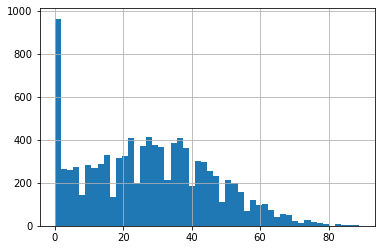

In [74]:
df["popularity"].hist(bins=50)

In [75]:
# df["popularity_predict"] = df["popularity"]
list_1 = range(0,21)
list_2 = range(21,41)
list_3 = range(41,101)
# list_4 = range(61,101)


In [76]:
df.loc[df.popularity.isin(list_1), 'popularity_predict'] = 1
df.loc[df.popularity.isin(list_2), 'popularity_predict'] = 2
df.loc[df.popularity.isin(list_3), 'popularity_predict'] = 3
# df.loc[df.popularity.isin(list_4), 'popularity_predict'] = 4
df.popularity_predict.value_counts()

2.0    3845
1.0    3675
3.0    2480
Name: popularity_predict, dtype: int64

In [77]:
df_classify = df.drop(["Unnamed: 0", "id", "name", "popularity", "artists", "id_artists", "release_date"], axis=1)
df_classify

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_predict
0,313547,0,0.683,0.940,4,-3.207,0,0.0613,0.028200,0.000000,0.1440,0.767,116.969,4,3.0
1,347947,0,0.537,0.469,9,-5.732,0,0.0259,0.734000,0.000000,0.2620,0.372,95.912,4,2.0
2,127936,0,0.752,0.148,9,-21.826,0,0.9410,0.441000,0.000000,0.3510,0.398,99.570,3,1.0
3,243307,0,0.742,0.811,10,-4.697,0,0.0829,0.146000,0.000000,0.2210,0.820,94.988,4,3.0
4,162587,0,0.552,0.360,2,-13.193,1,0.0288,0.424000,0.014700,0.1860,0.554,114.352,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,233800,0,0.460,0.772,1,-10.044,1,0.1630,0.689000,0.000067,0.2420,0.888,78.376,4,1.0
9996,131000,0,0.724,0.307,1,-26.447,1,0.9480,0.455000,0.000000,0.1400,0.390,89.917,4,1.0
9997,381293,0,0.655,0.780,1,-8.487,1,0.0337,0.404000,0.241000,0.0964,0.845,98.670,4,2.0
9998,155467,0,0.446,0.308,0,-8.675,1,0.0264,0.247000,0.001010,0.2010,0.372,93.750,4,1.0


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_classify.drop("popularity_predict", axis=1)
y = df_classify["popularity_predict"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [79]:
from sklearn.feature_selection import SelectKBest, f_classif

k=4
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
selector.transform(X_train)
selector.transform(X_test)

array([[ 6.9300e-01, -5.2340e+00,  6.1100e-01,  0.0000e+00],
       [ 6.6700e-01, -1.0920e+01,  6.1100e-01,  0.0000e+00],
       [ 5.9800e-01, -6.8500e+00,  9.8400e-02,  0.0000e+00],
       ...,
       [ 4.8300e-01, -1.1813e+01,  4.9800e-01,  2.4400e-02],
       [ 5.5800e-01, -1.0628e+01,  4.8900e-01,  3.7800e-06],
       [ 4.4600e-01, -1.3386e+01,  7.9200e-01,  1.3000e-01]])

In [80]:
selector.scores_
column_names = X_train.columns
top_features = sorted(zip(column_names, selector.scores_), key=lambda x: x[1], reverse=True)
top_features

[('acousticness', 451.12572425232764),
 ('loudness', 325.17063896365727),
 ('energy', 282.62840718257206),
 ('instrumentalness', 164.5253816880298),
 ('explicit', 153.6428279281707),
 ('danceability', 114.09369547983457),
 ('liveness', 20.898618575852424),
 ('time_signature', 20.34980237324505),
 ('speechiness', 12.828560200282478),
 ('tempo', 11.119264687539696),
 ('valence', 6.942392313550304),
 ('key', 5.317689609553297),
 ('mode', 4.688364671476737),
 ('duration_ms', 3.3173187814040714)]

In [81]:
selector

SelectKBest(k=4)

In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train_scaled, y_train)

SVC()

In [89]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test_scaled)
y_pred = pd.Series(y_pred, index=X_test.index)

confusion_matrix(y_test, y_pred)

array([[701, 445,  48],
       [311, 805, 176],
       [103, 412, 299]])

In [90]:
from sklearn.metrics import classification_report
target_names = ["not popular", "a bit popular", "a hit"]
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

  not popular       0.63      0.59      0.61      1194
a bit popular       0.48      0.62      0.55      1292
        a hit       0.57      0.37      0.45       814

     accuracy                           0.55      3300
    macro avg       0.56      0.53      0.53      3300
 weighted avg       0.56      0.55      0.54      3300



In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [92]:
y_pred = rf.predict(X_test)
y_pred = pd.Series(y_pred, index=X_test.index)

confusion_matrix(y_test, y_pred)

array([[696, 481,  17],
       [350, 914,  28],
       [133, 615,  66]])

In [93]:
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

  not popular       0.59      0.58      0.59      1194
a bit popular       0.45      0.71      0.55      1292
        a hit       0.59      0.08      0.14       814

     accuracy                           0.51      3300
    macro avg       0.55      0.46      0.43      3300
 weighted avg       0.54      0.51      0.46      3300

